créditos:https://colab.research.google.com/drive/1FvBBw2JNXHy9WeJusI2PPr2PMnGVbbGM#scrollTo=GBotcBrgqR30 (lembrar de referenciar)

In [78]:
#%matplotlib inline
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns


In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
#carregando o dataset
data_set = '/content/drive/My Drive/WESAD/'
s2_path = data_set + 'S2.pkl'
#modificação necessária pois os dados estavam em py2 e o ambiente usa py3
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [81]:
#Separando dados de peito de dados de pulso (apenas dados de peito serão considerados conforme análise dos dados)
c_ax=s2_data['signal']['chest']['ACC'][0:,0]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]
c_az=s2_data['signal']['chest']['ACC'][0:,2]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]
c_emg=s2_data['signal']['chest']['EMG'][:,0]
c_eda=s2_data['signal']['chest']['EDA'][:,0]
c_temp=s2_data['signal']['chest']['Temp'][:,0]
c_resp=s2_data['signal']['chest']['Resp'][:,0]
label=s2_data['label']

# Alterar o objeto de dicionário para um array numpy e o array para um dataframe

*(referenciar)*
**Python | Numpy ndarray.T**
https://www.geeksforgeeks.org/python-numpy-ndarray-t/

**Gerando e Manipulando Arrays em Python**
https://towardsdatascience.com/numpy-array-cookbook-generating-and-manipulating-arrays-in-python-2195c3988b09

In [82]:
peito = [c_ax, c_ay, c_az, c_ecg, c_eda, c_emg, c_resp, c_temp, label]
p_array = np.array(peito)
p_array = p_array.T #(transposição matriz)
Colunas = ['c_ax', 'c_ay', 'c_az', 'c_ecg', 'c_eda', 'c_emg', 'c_resp', 'c_temp', 'label']

p_df = pd.DataFrame(p_array, columns = Colunas)
p_df

,c_ax,c_ay,c_az,c_ecg,c_eda,c_emg,c_resp,c_temp,label
0,0.9554,-0.2220,-0.5580,0.021423,5.250549,-0.004440,-1.148987,30.120758,0.0
1,0.9258,-0.2216,-0.5538,0.020325,5.267334,0.004349,-1.124573,30.129517,0.0
2,0.9082,-0.2196,-0.5392,0.016525,5.243301,0.005173,-1.152039,30.138214,0.0
3,0.8974,-0.2102,-0.5122,0.016708,5.249405,0.007187,-1.158142,30.129517,0.0
4,0.8882,-0.2036,-0.4824,0.011673,5.286407,-0.015152,-1.161194,30.130951,0.0
...,...,...,...,...,...,...,...,...,...
4255295,0.8750,-0.1234,-0.2974,-0.013138,0.400162,0.020370,-1.063538,31.457733,0.0
4255296,0.8750,-0.1262,-0.2988,-0.010345,0.355911,0.019592,-1.106262,31.476898,0.0
4255297,0.8718,-0.1238,-0.3042,-0.005447,0.360489,-0.017166,-1.103210,31.459229,0.0
4255298,0.8730,-0.1234,-0.3026,0.000137,0.365829,-0.028976,-1.086426,31.484283,0.0


In [83]:
p_df.describe().T

,count,mean,std,min,25%,50%,75%,max
c_ax,4255300.0,0.753866,0.175116,0.215000,0.621000,0.856800,0.892200,2.029800
c_ay,4255300.0,-0.133188,0.064173,-0.660000,-0.149800,-0.125600,-0.095800,0.539000
c_az,4255300.0,-0.422681,0.300236,-1.135400,-0.717200,-0.322200,-0.209800,1.246800
c_ecg,4255300.0,0.001212,0.154077,-1.499542,-0.067978,0.008240,0.044357,1.499313
c_eda,4255300.0,1.528387,1.238425,0.263214,0.799561,1.163101,1.546478,7.576752
c_emg,4255300.0,-0.002413,0.011652,-0.414963,-0.008331,-0.001602,0.003983,0.300980
c_resp,4255300.0,0.054906,2.917749,-27.903748,-1.481628,-0.157166,1.618958,27.378845
c_temp,4255300.0,30.876676,1.281106,28.045258,30.574951,31.289917,31.815125,34.370392
label,4255300.0,1.212370,1.606596,0.000000,0.000000,0.000000,2.000000,7.000000


Identificando os rótulos, usando apenas:
neutro: 0
stress: 1
diversão: 2

Os demais serão desconsiderados nesse estudo

In [84]:
neutro = p_df.loc[p_df['label'] == 1]
stress = p_df.loc[p_df['label'] == 2]


p_loc = pd.concat([neutro, stress])
p_loc

,c_ax,c_ay,c_az,c_ecg,c_eda,c_emg,c_resp,c_temp,label
214583,0.8914,-0.1102,-0.2576,0.030945,5.710983,-0.003708,1.191711,29.083618,1.0
214584,0.8926,-0.1086,-0.2544,0.033646,5.719376,-0.014145,1.139832,29.122437,1.0
214585,0.8930,-0.1094,-0.2580,0.033005,5.706406,0.010208,1.141357,29.115234,1.0
214586,0.8934,-0.1082,-0.2538,0.031815,5.712509,0.012634,1.155090,29.126709,1.0
214587,0.8930,-0.1096,-0.2570,0.030350,5.727005,0.002060,1.133728,29.100861,1.0
...,...,...,...,...,...,...,...,...,...
2021977,0.8760,-0.1346,-0.3020,0.001328,3.075409,-0.004715,-1.161194,31.163483,2.0
2021978,0.8770,-0.1352,-0.2998,0.003433,3.059769,-0.003937,-1.124573,31.090057,2.0
2021979,0.8806,-0.1334,-0.2978,0.003616,3.078079,-0.009018,-1.097107,31.098877,2.0
2021980,0.8778,-0.1314,-0.2964,0.003525,3.058624,0.004944,-1.103210,31.101807,2.0


In [85]:
df_new = pd.DataFrame()

from scipy.signal import find_peaks,peak_widths
import numpy.fft as fft

In [86]:
for i in range(int(len(p_loc)/700)):
    x = p_loc.iloc[i:i+int(len(p_loc)/700),:]
    mn_acc_x = x['c_ax'].mean()
    #rint(mn_acc_x)
    mn_acc_y = x['c_ay'].mean()
    #rint(mn_acc_y)
    mn_acc_z = x['c_az'].mean()
    #rint(mn_acc_z)
    std_acc_x = x['c_ax'].std()
    #rint(std_acc_x)
    std_acc_y = x['c_ay'].std()
    # int(std_acc_y)
    std_acc_z = x['c_az'].std()
    #td_acc_z)
    itgl_acc_x = np.trapz(x['c_ax'])
    #rint(itgl_acc_x)
    itgl_acc_y = np.trapz(x['c_ay'])
    #int(itgl_acc_y)
    itgl_acc_z = np.trapz(x['c_az'])
    #(itgl_acc_z)
    mn_emg = x['c_emg'].mean()
    #rint(mn_emg)
    std_emg = x['c_emg'].std()
    #rint(std_emg)
    max_emg = np.amax(x['c_ax'])
    min_emg = np.amin(x['c_ax']) 
    dr_emg = max_emg/min_emg
    #rint(dr_emg)
    itgl_emg = np.trapz(x['c_emg'])
    med_emg = np.median(x['c_emg'])
    per_10_emg = np.percentile(x['c_emg'],10)
    per_90_emg = np.percentile(x['c_emg'],90)
    peaks,properties = find_peaks(x['c_emg'],height = 0)
    mn_pk_amp = np.mean(properties['peak_heights'])
    std_pk_amp = np.std(properties['peak_heights'])
    sum_pk_amp = np.sum(properties['peak_heights'])
    mn_temp = x['c_temp'].mean()
    std_temp = x['c_temp'].std()
    max_temp = x['c_temp'].max()
    min_temp = x['c_temp'].min()
    dr_temp = max_temp/min_temp
    mn_eda = x['c_eda'].mean()
    std_eda = x['c_eda'].std()
    max_eda = x['c_eda'].max()
    min_eda = x['c_eda'].min()
    dr_eda = max_eda/min_eda
    peaks,properties = find_peaks(x['c_eda'],height = 0)
    mn_scr = np.mean(properties['peak_heights'])
    std_scr = np.std(properties['peak_heights'])   
    num_scr = np.size(peaks)
    sum_scr = np.sum(properties['peak_heights'])
    width_scr = peak_widths(x['c_eda'], peaks, rel_height=0)
    #pltu_scr = np.array(properties['plateau_sizes'])
    ht_scr = properties['peak_heights']
    ar_scr = 0.5*np.matmul(ht_scr,width_scr[1])
    df_new = df_new.append({'mean_accx':mn_acc_x,'mean_accy':mn_acc_y,'mean_accz':mn_acc_z,'std_accx':std_acc_x,
                            'std_accy':std_acc_y,'std_accz':std_acc_z,'integral_accx':itgl_acc_x,'integral_accy':itgl_acc_y,
                            'integral_accz':itgl_acc_z,'mean_emg':mn_emg,'std_emg':std_emg,'drange_emg':dr_emg,'integral_emg':itgl_emg,
                            'median_emg':med_emg,'percentile_10_emg':per_10_emg,'percentile_90_emg':per_90_emg,'number_peaks':peaks.size,
                            'mean_peak_amplitudes':mn_pk_amp,'std_peak_amplitude':std_pk_amp,'sum_peak_amplitude':sum_pk_amp,'mean_temp':mn_temp,
                            'std_temp':std_temp,'drange_temp':dr_temp,'max_temp':max_temp,'min_temp':min_temp,'mean_eda':mn_eda,'std_eda':std_eda,
                            'max_eda':max_eda,'min_eda':min_eda,'drange_eda':dr_eda,'mean_scr_peaks':mn_scr,'std_scr_peaks':std_scr,'total_scr_peaks':num_scr,
                            'sum_scr_peaks':sum_scr,'area_peaks_scr':ar_scr},ignore_index = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: PeakPropertyWarning: some peaks have a width of 0


In [87]:
df_new

,area_peaks_scr,drange_eda,drange_emg,drange_temp,integral_accx,integral_accy,integral_accz,integral_emg,max_eda,max_temp,mean_accx,mean_accy,mean_accz,mean_eda,mean_emg,mean_peak_amplitudes,mean_scr_peaks,mean_temp,median_emg,min_eda,min_temp,number_peaks,percentile_10_emg,percentile_90_emg,std_accx,std_accy,std_accz,std_eda,std_emg,std_peak_amplitude,std_scr_peaks,std_temp,sum_peak_amplitude,sum_scr_peaks,total_scr_peaks
0,9339.412579,1.083968,1.060819,1.007073,1549.355404,-216.215301,-462.375900,-4.714233,5.756760,29.287872,0.881317,-0.122991,-0.263017,5.562593,-0.002687,0.018217,5.574400,29.134018,-0.002060,5.310822,29.082184,601.0,-0.028079,0.022412,0.008996,0.013069,0.016360,0.075922,0.020273,0.012293,0.075106,0.029731,5.956924,3350.214386,601.0
1,9323.056951,1.083968,1.060819,1.007073,1549.332704,-216.245801,-462.404000,-4.730988,5.756760,29.287872,0.881304,-0.123007,-0.263031,5.562443,-0.002702,0.018217,5.574158,29.134051,-0.002060,5.310822,29.082184,600.0,-0.028171,0.022412,0.008998,0.013071,0.016366,0.075891,0.020284,0.012293,0.074935,0.029707,5.956924,3344.495010,600.0
2,9323.056951,1.083968,1.060819,1.007073,1549.308604,-216.276001,-462.428600,-4.750809,5.756760,29.287872,0.881290,-0.123025,-0.263046,5.562298,-0.002702,0.018217,5.574158,29.134048,-0.002060,5.310822,29.082184,600.0,-0.028171,0.022412,0.008999,0.013073,0.016369,0.075834,0.020283,0.012293,0.074935,0.029709,5.956924,3344.495010,600.0
3,9337.991794,1.083968,1.060819,1.007073,1549.285804,-216.307002,-462.454600,-4.771797,5.756760,29.287872,0.881278,-0.123042,-0.263061,5.562147,-0.002711,0.018234,5.573977,29.134057,-0.002106,5.310822,29.082184,601.0,-0.028171,0.022412,0.008997,0.013075,0.016377,0.075811,0.020281,0.012308,0.075003,0.029705,5.944290,3349.960327,601.0
4,9321.592501,1.083968,1.060819,1.007073,1549.263804,-216.338302,-462.486200,-4.786102,5.756760,29.287872,0.881265,-0.123060,-0.263081,5.561996,-0.002723,0.018234,5.573722,29.134101,-0.002151,5.310822,29.082184,600.0,-0.028171,0.022412,0.008996,0.013077,0.016387,0.075777,0.020278,0.012308,0.074805,0.029752,5.944290,3344.233322,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,7430.291000,1.029399,1.036402,1.006823,1539.868798,-223.599901,-492.225100,-4.807869,5.476379,29.299408,0.875918,-0.127193,-0.279997,5.381519,-0.002730,0.013587,5.392633,29.146785,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016360,0.005326,0.008735,0.008920,0.030173,0.016315,0.010027,0.029721,0.028016,4.307236,2755.635452,511.0
1755,7430.291000,1.029399,1.036402,1.006823,1539.869998,-223.589001,-492.236599,-4.801643,5.476379,29.299408,0.875918,-0.127188,-0.280005,5.381442,-0.002718,0.013587,5.392633,29.146771,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016434,0.005326,0.008731,0.008931,0.030130,0.016328,0.010027,0.029721,0.028018,4.307236,2755.635452,511.0
1756,7430.291000,1.029399,1.036402,1.006823,1539.872998,-223.578301,-492.250699,-4.808899,5.476379,29.299408,0.875919,-0.127181,-0.280013,5.381387,-0.002724,0.013574,5.392633,29.146774,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016360,0.005325,0.008726,0.008941,0.030105,0.016323,0.010009,0.029721,0.028017,4.303070,2755.635452,511.0
1757,7429.612097,1.029399,1.036402,1.006823,1539.876998,-223.566601,-492.263599,-4.826683,5.476379,29.299408,0.875922,-0.127175,-0.280020,5.381312,-0.002745,0.013574,5.392387,29.146812,-0.001923,5.319977,29.100861,511.0,-0.022852,0.016342,0.005321,0.008723,0.008950,0.030094,0.016305,0.010009,0.029581,0.028042,4.303070,2755.509949,511.0


In [88]:
label = pd.DataFrame(columns = ['neutro', 'stress'])

for i in range(2):
               y = (i+1)*np.ones(int(len(df_new)/2))
               label = label.append(pd.DataFrame(y))
label = label.iloc[:,0]
label = label.reset_index()
label = label.iloc[:, -1]
label

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1753    2.0
1754    2.0
1755    2.0
1756    2.0
1757    2.0
Name: 0, Length: 1758, dtype: float64

In [89]:
df1 = pd.concat([df_new,label],axis = 1)

In [90]:
df1.iloc[:,-1]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1754    2.0
1755    2.0
1756    2.0
1757    2.0
1758    NaN
Name: 0, Length: 1759, dtype: float64

In [91]:
df1 = df1.rename(columns={0: "label"})

In [92]:
df1

,area_peaks_scr,drange_eda,drange_emg,drange_temp,integral_accx,integral_accy,integral_accz,integral_emg,max_eda,max_temp,mean_accx,mean_accy,mean_accz,mean_eda,mean_emg,mean_peak_amplitudes,mean_scr_peaks,mean_temp,median_emg,min_eda,min_temp,number_peaks,percentile_10_emg,percentile_90_emg,std_accx,std_accy,std_accz,std_eda,std_emg,std_peak_amplitude,std_scr_peaks,std_temp,sum_peak_amplitude,sum_scr_peaks,total_scr_peaks,label
0,9339.412579,1.083968,1.060819,1.007073,1549.355404,-216.215301,-462.375900,-4.714233,5.756760,29.287872,0.881317,-0.122991,-0.263017,5.562593,-0.002687,0.018217,5.574400,29.134018,-0.002060,5.310822,29.082184,601.0,-0.028079,0.022412,0.008996,0.013069,0.016360,0.075922,0.020273,0.012293,0.075106,0.029731,5.956924,3350.214386,601.0,1.0
1,9323.056951,1.083968,1.060819,1.007073,1549.332704,-216.245801,-462.404000,-4.730988,5.756760,29.287872,0.881304,-0.123007,-0.263031,5.562443,-0.002702,0.018217,5.574158,29.134051,-0.002060,5.310822,29.082184,600.0,-0.028171,0.022412,0.008998,0.013071,0.016366,0.075891,0.020284,0.012293,0.074935,0.029707,5.956924,3344.495010,600.0,1.0
2,9323.056951,1.083968,1.060819,1.007073,1549.308604,-216.276001,-462.428600,-4.750809,5.756760,29.287872,0.881290,-0.123025,-0.263046,5.562298,-0.002702,0.018217,5.574158,29.134048,-0.002060,5.310822,29.082184,600.0,-0.028171,0.022412,0.008999,0.013073,0.016369,0.075834,0.020283,0.012293,0.074935,0.029709,5.956924,3344.495010,600.0,1.0
3,9337.991794,1.083968,1.060819,1.007073,1549.285804,-216.307002,-462.454600,-4.771797,5.756760,29.287872,0.881278,-0.123042,-0.263061,5.562147,-0.002711,0.018234,5.573977,29.134057,-0.002106,5.310822,29.082184,601.0,-0.028171,0.022412,0.008997,0.013075,0.016377,0.075811,0.020281,0.012308,0.075003,0.029705,5.944290,3349.960327,601.0,1.0
4,9321.592501,1.083968,1.060819,1.007073,1549.263804,-216.338302,-462.486200,-4.786102,5.756760,29.287872,0.881265,-0.123060,-0.263081,5.561996,-0.002723,0.018234,5.573722,29.134101,-0.002151,5.310822,29.082184,600.0,-0.028171,0.022412,0.008996,0.013077,0.016387,0.075777,0.020278,0.012308,0.074805,0.029752,5.944290,3344.233322,600.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,7430.291000,1.029399,1.036402,1.006823,1539.868798,-223.599901,-492.225100,-4.807869,5.476379,29.299408,0.875918,-0.127193,-0.279997,5.381519,-0.002730,0.013587,5.392633,29.146785,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016360,0.005326,0.008735,0.008920,0.030173,0.016315,0.010027,0.029721,0.028016,4.307236,2755.635452,511.0,2.0
1755,7430.291000,1.029399,1.036402,1.006823,1539.869998,-223.589001,-492.236599,-4.801643,5.476379,29.299408,0.875918,-0.127188,-0.280005,5.381442,-0.002718,0.013587,5.392633,29.146771,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016434,0.005326,0.008731,0.008931,0.030130,0.016328,0.010027,0.029721,0.028018,4.307236,2755.635452,511.0,2.0
1756,7430.291000,1.029399,1.036402,1.006823,1539.872998,-223.578301,-492.250699,-4.808899,5.476379,29.299408,0.875919,-0.127181,-0.280013,5.381387,-0.002724,0.013574,5.392633,29.146774,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016360,0.005325,0.008726,0.008941,0.030105,0.016323,0.010009,0.029721,0.028017,4.303070,2755.635452,511.0,2.0
1757,7429.612097,1.029399,1.036402,1.006823,1539.876998,-223.566601,-492.263599,-4.826683,5.476379,29.299408,0.875922,-0.127175,-0.280020,5.381312,-0.002745,0.013574,5.392387,29.146812,-0.001923,5.319977,29.100861,511.0,-0.022852,0.016342,0.005321,0.008723,0.008950,0.030094,0.016305,0.010009,0.029581,0.028042,4.303070,2755.509949,511.0,2.0


In [93]:
df1 = df1.drop_duplicates(keep = 'first')

In [94]:
df1

,area_peaks_scr,drange_eda,drange_emg,drange_temp,integral_accx,integral_accy,integral_accz,integral_emg,max_eda,max_temp,mean_accx,mean_accy,mean_accz,mean_eda,mean_emg,mean_peak_amplitudes,mean_scr_peaks,mean_temp,median_emg,min_eda,min_temp,number_peaks,percentile_10_emg,percentile_90_emg,std_accx,std_accy,std_accz,std_eda,std_emg,std_peak_amplitude,std_scr_peaks,std_temp,sum_peak_amplitude,sum_scr_peaks,total_scr_peaks,label
0,9339.412579,1.083968,1.060819,1.007073,1549.355404,-216.215301,-462.375900,-4.714233,5.756760,29.287872,0.881317,-0.122991,-0.263017,5.562593,-0.002687,0.018217,5.574400,29.134018,-0.002060,5.310822,29.082184,601.0,-0.028079,0.022412,0.008996,0.013069,0.016360,0.075922,0.020273,0.012293,0.075106,0.029731,5.956924,3350.214386,601.0,1.0
1,9323.056951,1.083968,1.060819,1.007073,1549.332704,-216.245801,-462.404000,-4.730988,5.756760,29.287872,0.881304,-0.123007,-0.263031,5.562443,-0.002702,0.018217,5.574158,29.134051,-0.002060,5.310822,29.082184,600.0,-0.028171,0.022412,0.008998,0.013071,0.016366,0.075891,0.020284,0.012293,0.074935,0.029707,5.956924,3344.495010,600.0,1.0
2,9323.056951,1.083968,1.060819,1.007073,1549.308604,-216.276001,-462.428600,-4.750809,5.756760,29.287872,0.881290,-0.123025,-0.263046,5.562298,-0.002702,0.018217,5.574158,29.134048,-0.002060,5.310822,29.082184,600.0,-0.028171,0.022412,0.008999,0.013073,0.016369,0.075834,0.020283,0.012293,0.074935,0.029709,5.956924,3344.495010,600.0,1.0
3,9337.991794,1.083968,1.060819,1.007073,1549.285804,-216.307002,-462.454600,-4.771797,5.756760,29.287872,0.881278,-0.123042,-0.263061,5.562147,-0.002711,0.018234,5.573977,29.134057,-0.002106,5.310822,29.082184,601.0,-0.028171,0.022412,0.008997,0.013075,0.016377,0.075811,0.020281,0.012308,0.075003,0.029705,5.944290,3349.960327,601.0,1.0
4,9321.592501,1.083968,1.060819,1.007073,1549.263804,-216.338302,-462.486200,-4.786102,5.756760,29.287872,0.881265,-0.123060,-0.263081,5.561996,-0.002723,0.018234,5.573722,29.134101,-0.002151,5.310822,29.082184,600.0,-0.028171,0.022412,0.008996,0.013077,0.016387,0.075777,0.020278,0.012308,0.074805,0.029752,5.944290,3344.233322,600.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,7430.291000,1.029399,1.036402,1.006823,1539.868798,-223.599901,-492.225100,-4.807869,5.476379,29.299408,0.875918,-0.127193,-0.279997,5.381519,-0.002730,0.013587,5.392633,29.146785,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016360,0.005326,0.008735,0.008920,0.030173,0.016315,0.010027,0.029721,0.028016,4.307236,2755.635452,511.0,2.0
1755,7430.291000,1.029399,1.036402,1.006823,1539.869998,-223.589001,-492.236599,-4.801643,5.476379,29.299408,0.875918,-0.127188,-0.280005,5.381442,-0.002718,0.013587,5.392633,29.146771,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016434,0.005326,0.008731,0.008931,0.030130,0.016328,0.010027,0.029721,0.028018,4.307236,2755.635452,511.0,2.0
1756,7430.291000,1.029399,1.036402,1.006823,1539.872998,-223.578301,-492.250699,-4.808899,5.476379,29.299408,0.875919,-0.127181,-0.280013,5.381387,-0.002724,0.013574,5.392633,29.146774,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016360,0.005325,0.008726,0.008941,0.030105,0.016323,0.010009,0.029721,0.028017,4.303070,2755.635452,511.0,2.0
1757,7429.612097,1.029399,1.036402,1.006823,1539.876998,-223.566601,-492.263599,-4.826683,5.476379,29.299408,0.875922,-0.127175,-0.280020,5.381312,-0.002745,0.013574,5.392387,29.146812,-0.001923,5.319977,29.100861,511.0,-0.022852,0.016342,0.005321,0.008723,0.008950,0.030094,0.016305,0.010009,0.029581,0.028042,4.303070,2755.509949,511.0,2.0


In [95]:
df1.iloc[:,-1]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1754    2.0
1755    2.0
1756    2.0
1757    2.0
1758    NaN
Name: label, Length: 1759, dtype: float64

In [96]:
df1.isna().sum()

area_peaks_scr          0
drange_eda              0
drange_emg              0
drange_temp             0
integral_accx           0
integral_accy           0
integral_accz           0
integral_emg            0
max_eda                 0
max_temp                0
mean_accx               0
mean_accy               0
mean_accz               0
mean_eda                0
mean_emg                0
mean_peak_amplitudes    0
mean_scr_peaks          0
mean_temp               0
median_emg              0
min_eda                 0
min_temp                0
number_peaks            0
percentile_10_emg       0
percentile_90_emg       0
std_accx                0
std_accy                0
std_accz                0
std_eda                 0
std_emg                 0
std_peak_amplitude      0
std_scr_peaks           0
std_temp                0
sum_peak_amplitude      0
sum_scr_peaks           0
total_scr_peaks         0
label                   1
dtype: int64

In [97]:
df1 = df1.dropna()

In [98]:
df1.isna().sum().sum()

0

In [99]:
df1

,area_peaks_scr,drange_eda,drange_emg,drange_temp,integral_accx,integral_accy,integral_accz,integral_emg,max_eda,max_temp,mean_accx,mean_accy,mean_accz,mean_eda,mean_emg,mean_peak_amplitudes,mean_scr_peaks,mean_temp,median_emg,min_eda,min_temp,number_peaks,percentile_10_emg,percentile_90_emg,std_accx,std_accy,std_accz,std_eda,std_emg,std_peak_amplitude,std_scr_peaks,std_temp,sum_peak_amplitude,sum_scr_peaks,total_scr_peaks,label
0,9339.412579,1.083968,1.060819,1.007073,1549.355404,-216.215301,-462.375900,-4.714233,5.756760,29.287872,0.881317,-0.122991,-0.263017,5.562593,-0.002687,0.018217,5.574400,29.134018,-0.002060,5.310822,29.082184,601.0,-0.028079,0.022412,0.008996,0.013069,0.016360,0.075922,0.020273,0.012293,0.075106,0.029731,5.956924,3350.214386,601.0,1.0
1,9323.056951,1.083968,1.060819,1.007073,1549.332704,-216.245801,-462.404000,-4.730988,5.756760,29.287872,0.881304,-0.123007,-0.263031,5.562443,-0.002702,0.018217,5.574158,29.134051,-0.002060,5.310822,29.082184,600.0,-0.028171,0.022412,0.008998,0.013071,0.016366,0.075891,0.020284,0.012293,0.074935,0.029707,5.956924,3344.495010,600.0,1.0
2,9323.056951,1.083968,1.060819,1.007073,1549.308604,-216.276001,-462.428600,-4.750809,5.756760,29.287872,0.881290,-0.123025,-0.263046,5.562298,-0.002702,0.018217,5.574158,29.134048,-0.002060,5.310822,29.082184,600.0,-0.028171,0.022412,0.008999,0.013073,0.016369,0.075834,0.020283,0.012293,0.074935,0.029709,5.956924,3344.495010,600.0,1.0
3,9337.991794,1.083968,1.060819,1.007073,1549.285804,-216.307002,-462.454600,-4.771797,5.756760,29.287872,0.881278,-0.123042,-0.263061,5.562147,-0.002711,0.018234,5.573977,29.134057,-0.002106,5.310822,29.082184,601.0,-0.028171,0.022412,0.008997,0.013075,0.016377,0.075811,0.020281,0.012308,0.075003,0.029705,5.944290,3349.960327,601.0,1.0
4,9321.592501,1.083968,1.060819,1.007073,1549.263804,-216.338302,-462.486200,-4.786102,5.756760,29.287872,0.881265,-0.123060,-0.263081,5.561996,-0.002723,0.018234,5.573722,29.134101,-0.002151,5.310822,29.082184,600.0,-0.028171,0.022412,0.008996,0.013077,0.016387,0.075777,0.020278,0.012308,0.074805,0.029752,5.944290,3344.233322,600.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,7430.918160,1.029399,1.036402,1.006823,1539.866398,-223.610000,-492.215200,-4.805489,5.476379,29.299408,0.875917,-0.127200,-0.279991,5.381594,-0.002736,0.013587,5.392860,29.146727,-0.001923,5.319977,29.100861,511.0,-0.022852,0.016360,0.005327,0.008739,0.008914,0.030187,0.016313,0.010027,0.029838,0.027967,4.307236,2755.751419,511.0,2.0
1754,7430.291000,1.029399,1.036402,1.006823,1539.868798,-223.599901,-492.225100,-4.807869,5.476379,29.299408,0.875918,-0.127193,-0.279997,5.381519,-0.002730,0.013587,5.392633,29.146785,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016360,0.005326,0.008735,0.008920,0.030173,0.016315,0.010027,0.029721,0.028016,4.307236,2755.635452,511.0,2.0
1755,7430.291000,1.029399,1.036402,1.006823,1539.869998,-223.589001,-492.236599,-4.801643,5.476379,29.299408,0.875918,-0.127188,-0.280005,5.381442,-0.002718,0.013587,5.392633,29.146771,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016434,0.005326,0.008731,0.008931,0.030130,0.016328,0.010027,0.029721,0.028018,4.307236,2755.635452,511.0,2.0
1756,7430.291000,1.029399,1.036402,1.006823,1539.872998,-223.578301,-492.250699,-4.808899,5.476379,29.299408,0.875919,-0.127181,-0.280013,5.381387,-0.002724,0.013574,5.392633,29.146774,-0.001877,5.319977,29.100861,511.0,-0.022852,0.016360,0.005325,0.008726,0.008941,0.030105,0.016323,0.010009,0.029721,0.028017,4.303070,2755.635452,511.0,2.0


In [100]:
df1 = pd.DataFrame(df1)

# Normalizando dados: train test

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_axis.html (referenciar)

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
 
# separar as variáveis independentes da variável alvo
x = df1.drop(['label'], axis=1)
y = df1['label']
 
# padronizar as colunas numéricas
X = StandardScaler().fit_transform(x)
 
# label encoder na variável alvo
Y = LabelEncoder().fit_transform(y)
 
# dividir o dataset entre treino e teste
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [102]:
x_train

,area_peaks_scr,drange_eda,drange_emg,drange_temp,integral_accx,integral_accy,integral_accz,integral_emg,max_eda,max_temp,mean_accx,mean_accy,mean_accz,mean_eda,mean_emg,mean_peak_amplitudes,mean_scr_peaks,mean_temp,median_emg,min_eda,min_temp,number_peaks,percentile_10_emg,percentile_90_emg,std_accx,std_accy,std_accz,std_eda,std_emg,std_peak_amplitude,std_scr_peaks,std_temp,sum_peak_amplitude,sum_scr_peaks,total_scr_peaks
199,9014.530346,1.076210,1.060819,1.006924,1546.632603,-221.320802,-469.330200,-4.884201,5.715561,29.287872,0.879769,-0.125892,-0.266970,5.533041,-0.002774,0.018306,5.546345,29.136237,-0.002060,5.310822,29.086487,586.0,-0.028711,0.022156,0.008597,0.012338,0.015627,0.068300,0.020285,0.012267,0.066103,0.029971,5.894577,3250.158310,586.0
700,8338.522730,1.052794,1.060819,1.006625,1543.370601,-232.799702,-477.668200,-4.785439,5.591202,29.287872,0.877909,-0.132417,-0.271719,5.469318,-0.002725,0.017806,5.486350,29.140757,-0.002243,5.310822,29.095123,554.0,-0.027393,0.021313,0.008134,0.007655,0.016058,0.055784,0.019648,0.012490,0.054171,0.029442,5.448669,3039.437866,554.0
526,8475.943307,1.059546,1.060819,1.006824,1544.466601,-229.708002,-474.257200,-4.769623,5.627060,29.287872,0.878533,-0.130658,-0.269771,5.488894,-0.002716,0.018537,5.506574,29.139285,-0.002151,5.310822,29.089355,559.0,-0.028253,0.021927,0.008001,0.009843,0.015683,0.058464,0.020231,0.012796,0.054948,0.029847,5.764938,3078.174973,559.0
1223,7811.337691,1.047694,1.036402,1.006972,1541.442701,-228.200802,-487.107500,-4.926270,5.564117,29.299408,0.876820,-0.129805,-0.277073,5.421416,-0.002799,0.015400,5.434149,29.144740,-0.002060,5.310822,29.096558,529.0,-0.024683,0.018265,0.005307,0.007659,0.009256,0.048639,0.018112,0.011415,0.049950,0.029177,4.912674,2874.664688,529.0
1603,7490.849403,1.034835,1.036402,1.006823,1540.038098,-224.637401,-490.689399,-4.835243,5.518723,29.299408,0.876018,-0.127780,-0.279123,5.392273,-0.002749,0.014045,5.403968,29.146419,-0.001785,5.332947,29.100861,513.0,-0.023849,0.017194,0.005243,0.008893,0.008673,0.034759,0.017218,0.010819,0.034973,0.028811,4.508286,2772.235489,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,7911.375355,1.047694,1.037097,1.007021,1541.686501,-229.680702,-485.869200,-4.918304,5.564117,29.299408,0.876958,-0.130644,-0.276366,5.428989,-0.002803,0.016009,5.443149,29.144313,-0.002335,5.310822,29.095123,534.0,-0.024875,0.019327,0.005496,0.006958,0.009395,0.051121,0.018455,0.011787,0.052384,0.029324,4.994934,2906.641769,534.0
1294,7764.532941,1.039342,1.036402,1.006972,1541.086600,-226.793302,-488.832099,-4.853233,5.542755,29.299408,0.876615,-0.129004,-0.278055,5.415935,-0.002762,0.015022,5.428135,29.144863,-0.002060,5.332947,29.096558,527.0,-0.024518,0.018192,0.005243,0.008173,0.008365,0.046408,0.017873,0.011227,0.047582,0.028936,4.837006,2860.627365,527.0
860,8158.716170,1.051645,1.060819,1.007021,1541.887600,-232.424602,-482.652600,-4.791481,5.585098,29.299408,0.877068,-0.132202,-0.274531,5.453888,-0.002728,0.016917,5.471497,29.142596,-0.002380,5.310822,29.095123,545.0,-0.025049,0.019876,0.007090,0.007210,0.012938,0.055080,0.018741,0.011877,0.054409,0.029950,5.159775,2981.966019,545.0
1459,7623.836513,1.037625,1.036402,1.006823,1540.435399,-225.274802,-489.626499,-4.824852,5.533600,29.299408,0.876242,-0.128142,-0.278516,5.403200,-0.002740,0.014509,5.414864,29.145949,-0.002014,5.332947,29.100861,520.0,-0.024124,0.017834,0.005248,0.008803,0.008676,0.040320,0.017618,0.011193,0.041217,0.029274,4.686493,2815.729141,520.0


In [103]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.neural_network import MLPClassifier

In [104]:
  clf = MLPClassifier(solver='adam',  activation='relu',
                        verbose=10,
                        max_iter=100,
                        tol=1e-9,
                        hidden_layer_sizes=(34,),
                        random_state=1)

In [105]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 146.65521791
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = 8.48286509
Iteration 7, loss = 7.95515309
Iteration 8, loss = 7.87108319
Iteration 9, loss = 7.26964495
Iteration 10, loss = 7.00793001
Iteration 11, loss = 6.59942820
Iteration 12, loss = 7.27908416
Iteration 13, loss = 5.75953787
Iteration 14, loss = 5.58532579
Iteration 15, loss = 4.08857261
Iteration 16, loss = 3.30144318
Iteration 17, loss = 4.01864195
Iteration 18, loss = 2.31852512
Iteration 19, loss = 1.92313266
Iteration 20, loss = 2.44975373
Iteration 21, loss = 1.22785026
Iteration 22, loss = 1.91471252
Iteration 23, loss = 1.19842987
Iteration 24, loss = 2.26247901
Iteration 25, loss = 0.87997259
Iteration 26, loss = 0.73846061
Iteration 27, loss = 1.09929005
Iteration 28, loss = 1.26470118
Iteration 29, loss = 0.98091766
Iteration 30, loss = 2.14685471
Iteration 31, loss = 2.44138168
Iteration 32, loss = 1.43936589
Iteration 3

In [110]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8522727272727273

In [108]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[183,   0],
       [ 52, 117]])

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.78      1.00      0.88       183
         2.0       1.00      0.69      0.82       169

    accuracy                           0.85       352
   macro avg       0.89      0.85      0.85       352
weighted avg       0.88      0.85      0.85       352



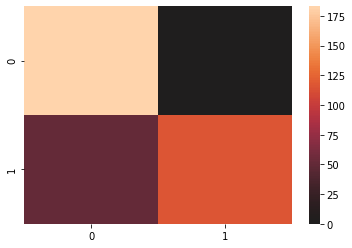

In [113]:
import matplotlib.pyplot as plt

sns.heatmap(cm, center=True)
plt.show()